# Beer Preference Analysis
### Spring 2024 Data Science Project
Name: Aryan Kalaria

## Introduction

This tutorial is an analysis of a beer preference dataset. From this dataset, we can draw many observations. My goals for this analysis are the following:

1. What customers prefer Light beer over Regular beer?
2. What factors are significant in determining beer preference among individuals?
3. In order to assist with targeted marketing, how can the customer base be divided into characteristically different groups? The company wants fewer number of groups to make marketing easier.

These questions are important to answer because they will not only help the company identify customer groups, but increase their sales for said groups by engaging their customers in trageted marketing. They can also use this data to identify what kind of customers prefer what kind of beer. As we go about solving these problems, we will also learn more about data science and eploratory data analysis in general.

## Data curation

Dataset chosen: Hacker-Pschorr Beer Preference Dataset

What is this dataset?  
This is a dataset that describes customers based on their characteristics such as gender, marital status, income, etc. It tells us what kind of beer a customer prefers between Light beer and Regular beer.

Why am I choosing this dataset?  
I want to develop a predictive model that would use machine learning to predict what customers would prefer what kind of beer. My goal is to incorporate logistic regression to classify customers into groups based on their characteristic. I also plan on using K-nearest neighbors to identify groups that would prefer different kinds of beers, in order to direct better marketing based on groups.

I will start by importing certain libraries. The libraries I have chosen are:
1. pandas: This library has functions and classes that allow us to perform data science application on datasets.
2. matplotlib: This library has funcitons and classes that can help us create beautiful graphs and plots from pandas dataframes.
3. seaborn: This library also helps in creating graphs from dataframes.
4. scipy: Allows us to perform statistical tests like ANOVA or t-test.
5. plotly: This will help us create a scatterplot matrix of the valriables to understand implicit interactions between them.
6. sklearn: This library has functions that can create machine learning models.
7. tensorflow: This library makes creating and using neural networks very simple.
8. graphviz: This helps in graphing. I will use this for creating a decision tree.
9. numpy: This is a library that helps in manipulating lists and performing complex mathematical opreations on them.

In [34]:
# Importing required libraries

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

import plotly.express as px

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import graphviz

import numpy as np

import warnings
warnings.filterwarnings('ignore')

I will now read from the csv file that has the required data. The read data will be put inside a pandas dataframe. This dataframe will make manipulation and analysis of this data very easy.

In [35]:
# Reading csv and printing the first 5 rows
beer_data = pd.read_csv("beer.csv")
beer_data.head()

,Gender,Married,Income,Age,Preference
0,F,No,31779,46,Regular
1,M,Yes,32739,50,Regular
2,M,Yes,24302,46,Regular
3,M,Yes,64709,70,Regular
4,M,Yes,41882,54,Regular


The above output can helps us get an idea of how the data in the dataframe is formatted. As we can see, the income and age look like integers and will probably be "int64" types. The others look like strings.

In [36]:
# Checking datatypes
beer_data.dtypes

Gender        object
Married       object
Income         int64
Age            int64
Preference    object
dtype: object

Here, I see that Gender, Married and Preference are (string) categorical variables. In order to make computations simpler, I will convert these to values "0" and "1". I will map them in the following way:
1. Gender: M = 1, F = 0
2. Married: Yes = 1, No = 0
3. Preference: Regular = 1, Light = 0

In [37]:
# Formatting columns
beer = beer_data
beer['Gender'] = beer['Gender'].replace({'M': 1, 'F': 0})
beer['Married'] = beer['Married'].replace({'Yes': 1, 'No': 0})
beer['Preference'] = beer['Preference'].replace({'Regular': 1, 'Light': 0})
beer.head()

,Gender,Married,Income,Age,Preference
0,0,0,31779,46,1
1,1,1,32739,50,1
2,1,1,24302,46,1
3,1,1,64709,70,1
4,1,1,41882,54,1


Now, I can check for null and missing values.

In [38]:
# Checking for nulls
null_values = beer.isnull().sum()
null_values

Gender        0
Married       0
Income        0
Age           0
Preference    0
dtype: int64

As, we can see there are no null values, so we are done cleaning this dataset. Now, I can start exploring this dataset.

In [39]:
# Checking row and column length
beer.shape

(100, 5)

## Exploratory data analysis

Now, we can begin exploring this data. I will start by looking at unique values.

In [40]:
# Checking for unique values
beer.nunique()

Gender          2
Married         2
Income        100
Age            47
Preference      2
dtype: int64

I can now look at how the column Age is distributed.

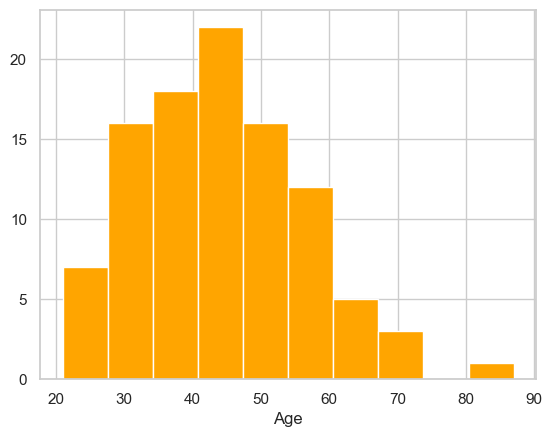

In [41]:
# Histogram of Age
plt.hist(beer['Age'], color = 'orange')
plt.xlabel('Age')
plt.show()

In [42]:
# Summary statistics of Age
summary_stats = beer['Age'].describe()
print(summary_stats)

count    100.00000
mean      44.16000
std       12.03003
min       21.00000
25%       36.00000
50%       43.00000
75%       51.25000
max       87.00000
Name: Age, dtype: float64


Similarly, we can do this for Income.

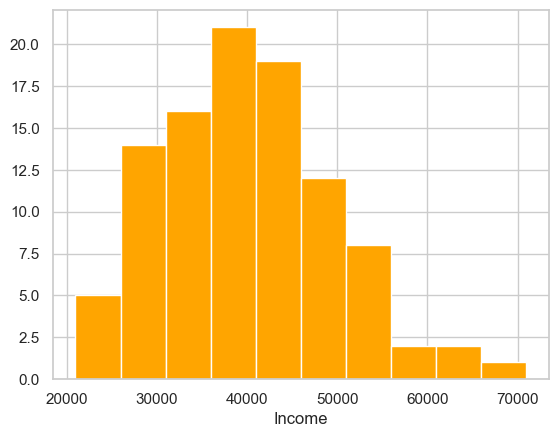

In [43]:
# Histogram of Income
plt.hist(beer['Income'], color = 'orange')
plt.xlabel('Income')
plt.show()

In [44]:
# Summary statistics of Age
summary_stats = beer['Income'].describe()
print(summary_stats)

count      100.000000
mean     40064.310000
std       9725.018742
min      20945.000000
25%      33072.750000
50%      39646.500000
75%      45775.750000
max      70981.000000
Name: Income, dtype: float64


We can now start asking questions about this dataset to spot possible trends within the data.

1. Is there any correlation between Age and Income?

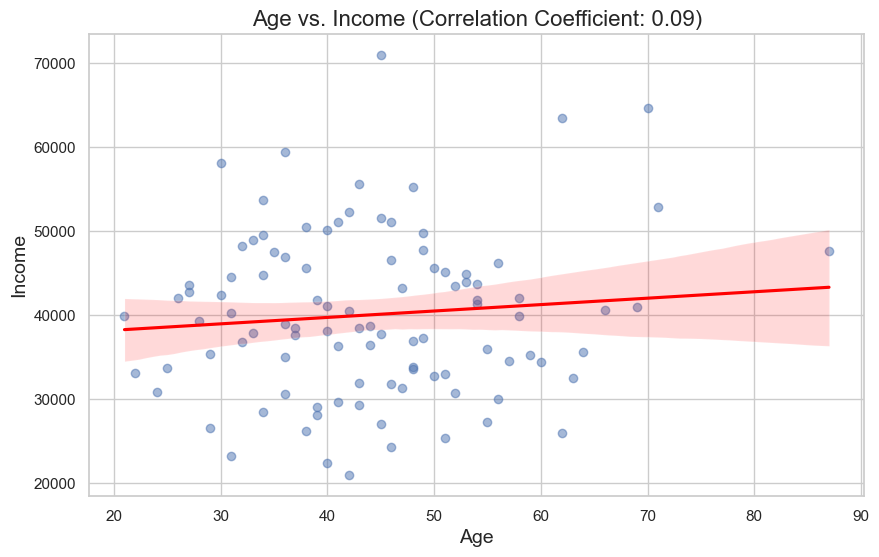

Pearson Correlation Coefficient (r): 0.09456949482972121


In [45]:
# Calculate correlation coefficient
correlation_coefficient = beer['Age'].corr(beer['Income'])

# Set style for seaborn
sns.set(style="whitegrid")

# Create scatter plot with regression line and correlation coefficient annotation
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Income', data=beer, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Age vs. Income (Correlation Coefficient: {correlation_coefficient:.2f})', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.grid(True)
plt.show()

print("Pearson Correlation Coefficient (r):", correlation_coefficient)

There is no correlation between Age and Income. We can see this because the regression line is almost flat and the points in the above graph are all randomly spread out; no pattern indicated. The correlation coefficient is also very low.

2. Does a Male and a Female customer have a difference in average Income?

In [46]:
# Separate Income based on Gender
income_male = beer[beer['Gender'] == 1]['Income']
income_female = beer[beer['Gender'] == 0]['Income']

# Perform t-test
t_statistic, p_value = ttest_ind(income_male, income_female, equal_var=False)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in Income between Male and Female.")
else:
    print("There is no significant difference in Income between Male and Female.")


T-statistic: 0.4659576515850957
P-value: 0.6422807819211965
There is no significant difference in Income between Male and Female.


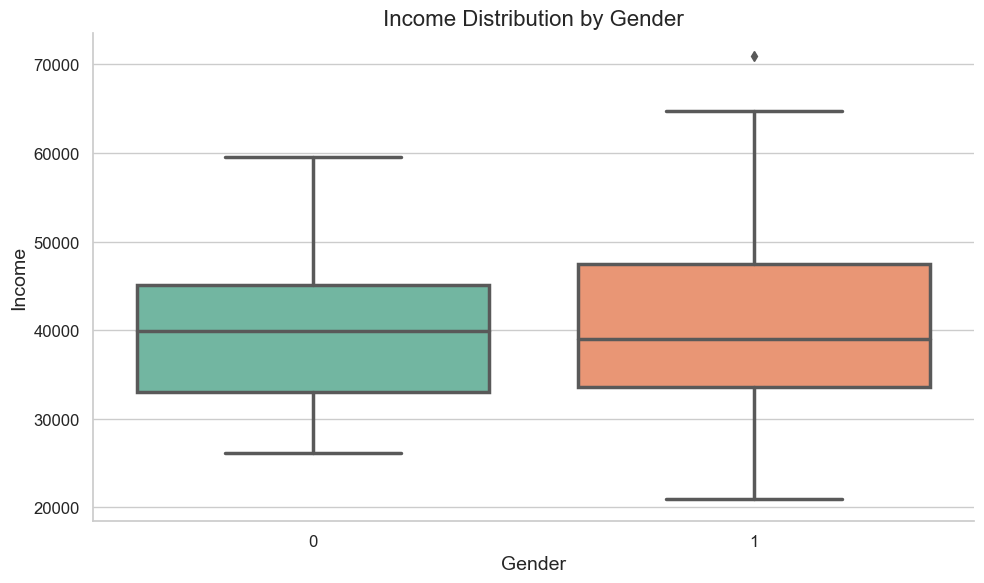

In [47]:
# Set style for seaborn
sns.set(style="whitegrid")

# Create box plot for Income by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Income', data=beer, palette='Set2', linewidth=2.5)
sns.despine()  # Remove the top and right spines
plt.title('Income Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Therefore, on average, the average income of a person is not affected by that person's gender.

3. What is the association between Gender and Preference?

In [48]:
# Create a contingency table of Gender and Preference
contingency_table = pd.crosstab(beer['Gender'], beer['Preference'])

# Perform chi-square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Interpret the results
if p_value < 0.05:
    print("There is a significant association between Gender and Preference.")
else:
    print("There is no significant association between Gender and Preference.")


Chi-square statistic: 1.4687882496940023
P-value: 0.2255369779458134
Degrees of freedom: 1
Expected frequencies table:
[[21.5 21.5]
 [28.5 28.5]]
There is no significant association between Gender and Preference.


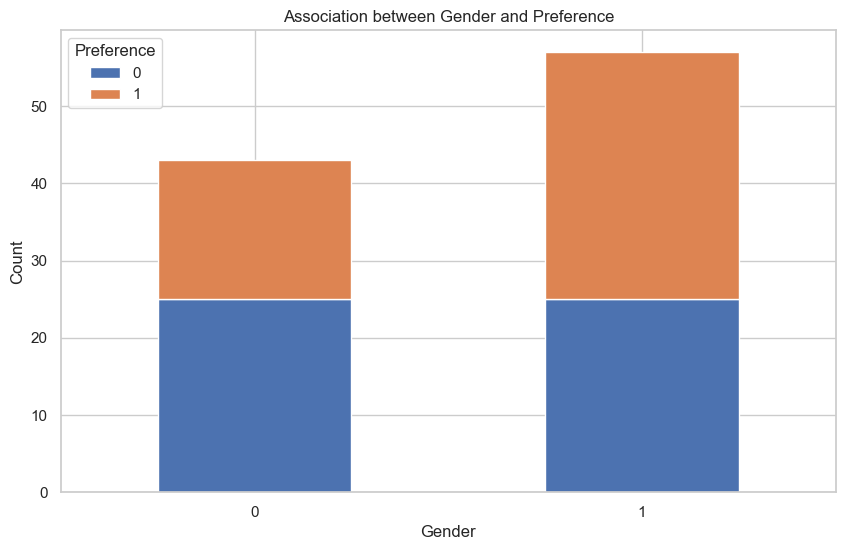

In [49]:
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Association between Gender and Preference')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Preference')
plt.show()

Therefore, in general, there is no significant relation between gender and preference of beer.

4. Is there an association between preference and income?

In [50]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*[beer[beer['Preference'] == pref]['Income'] for pref in beer['Preference'].unique()])

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a significant association between Preference and Income.")
else:
    print("There is no significant association between Preference and Income.")

F-statistic: 34.54463643166953
P-value: 5.754106859554893e-08
There is a significant association between Preference and Income.


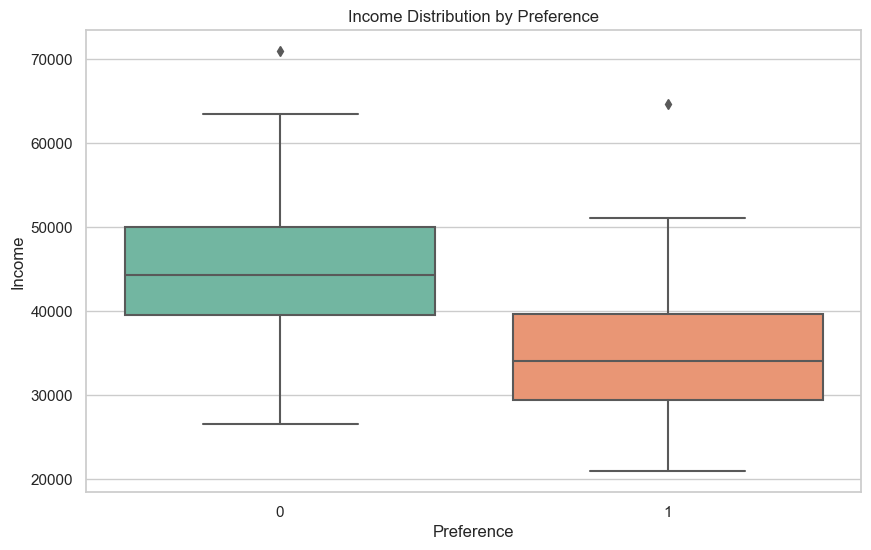

In [51]:
# Set style for seaborn
sns.set(style="whitegrid")

# Create box plot for Income by Preference
plt.figure(figsize=(10, 6))
sns.boxplot(x='Preference', y='Income', data=beer, palette='Set2')
plt.title('Income Distribution by Preference')
plt.xlabel('Preference')
plt.ylabel('Income')
plt.show()

Therefore, there is an association between income and beer preference. From the plot, we can see that people with higher income (40,000 USD to 50,000 USD approx.) tend to prefer Regular beer over Light beer, whereas people with a lower income (30,000 USD to 40,000 USD approx.) tend to prefer Light beer.

## Primary analysis

Now that we have played around with the data a little, we can start looking at some machine learning models we can use to answer the questions we posed at the beginning of the project. From the above analysis, we can see that there is indeed a relationship between Income and Preference. We can begin by looking at what variables are related to each other.

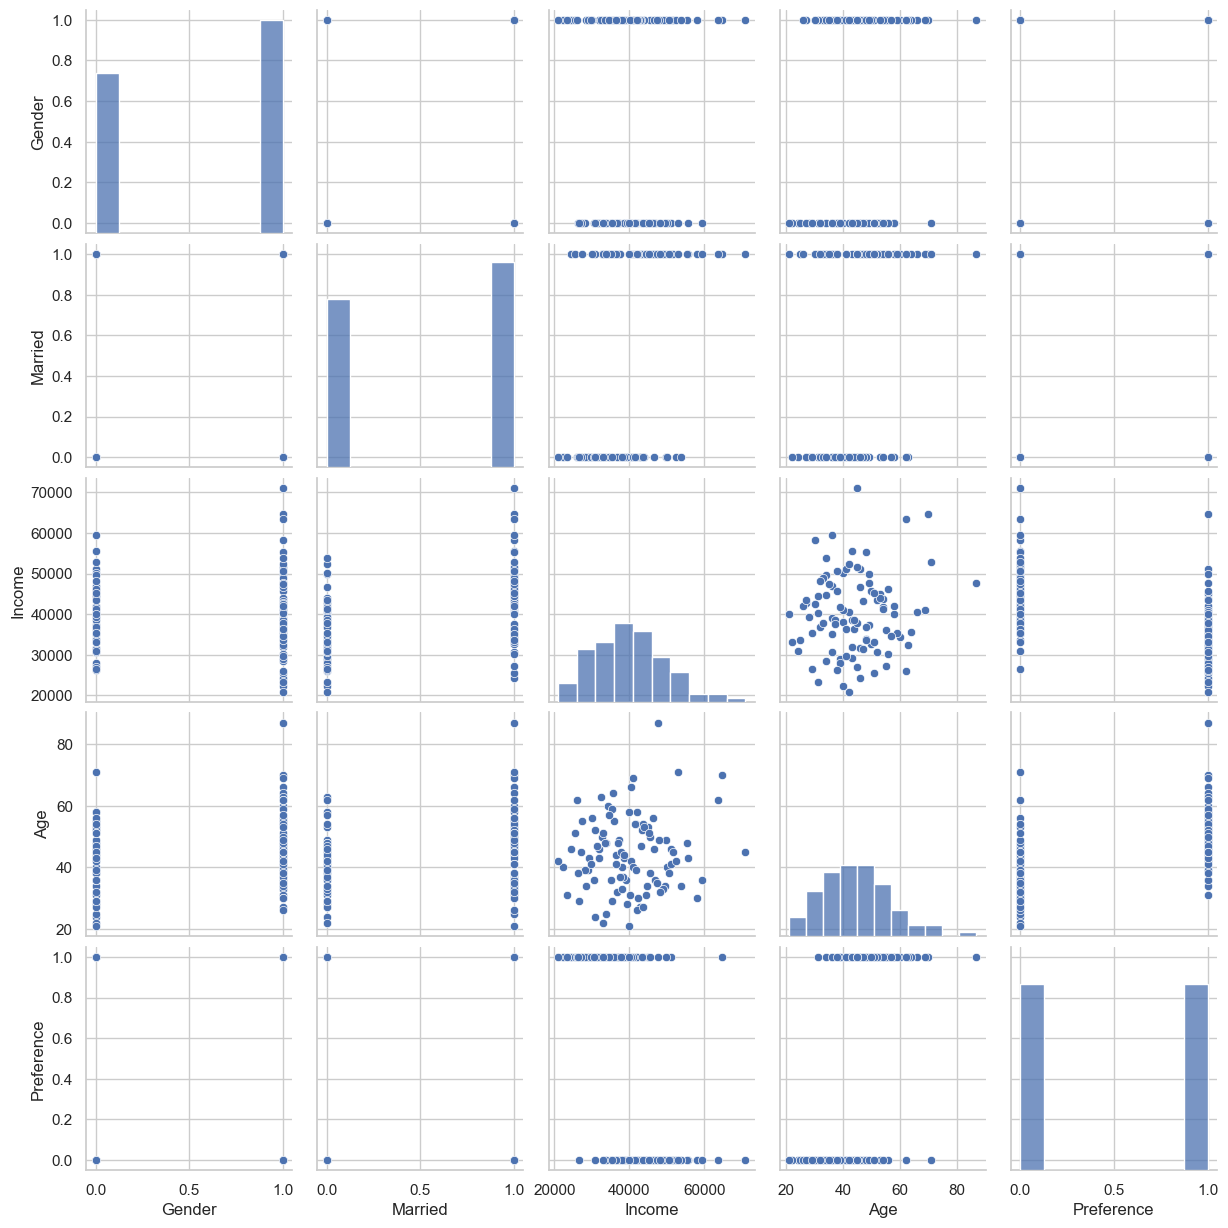

In [52]:
sns.pairplot(beer, diag_kind='hist')
plt.show()

That doesn't really give us a good idea of what the variable interactions among the attributes looks like. However, we can see how the data within each attribute is distributed. What I want to do now is train different machine learning models and find which one has the best classification accuracy.

### Logistic Regression

In order to do Logistic regression, I will use the LogisticRegression function in the sklearn library.

In [53]:
# Separate predictors and response
feature_cols = ["Gender", "Married", "Income", "Age"]
X = beer[feature_cols]
y = beer["Preference"]

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# Fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

Now that we have created our model, we can check our model's accuracy on the testing data.

In [54]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


As we can see, this model has high accuracy. Now, we can move onto the next model.

### Decision Tree

First, we will fit the decision tree.

In [55]:
# Create decision tree classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

Now that we have created the model, we can check it's accuracy on the testing data.

In [56]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7666666666666667


### Neural Network

In [57]:
nn = Sequential([
    (Dense(3, input_shape = (X_train.shape[1],), activation = "relu")),
    (Dense(1, activation = "sigmoid"))
])
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5715 - loss: 0.7381 - val_accuracy: 0.5667 - val_loss: 0.7808
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5676 - loss: 0.7117 - val_accuracy: 0.5667 - val_loss: 0.7785
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5637 - loss: 0.7140 - val_accuracy: 0.5667 - val_loss: 0.7759
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5637 - loss: 0.7218 - val_accuracy: 0.5667 - val_loss: 0.7732
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5325 - loss: 0.7712 - val_accuracy: 0.5667 - val_loss: 0.7705
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5520 - loss: 0.7288 - val_accuracy: 0.5667 - val_loss: 0.7682
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5410 - loss: 0.7154 - val_accuracy: 0.5667 - val_loss: 0.7660
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5715 - loss: 0.7273 - val_accuracy: 0.5667 - val_loss: 0.7639
Epoch 9

In [58]:
loss, accuracy = nn.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5667 - loss: 0.7595
Accuracy: 0.5666666626930237


### Comparing models

Looking at the accuracies for all the models above, we can rank them in the following way:
1. Logistic Regression
2. Decision Tree
3. Neural Network

Now, let us compare their ROC curves.

#### Logistic regression

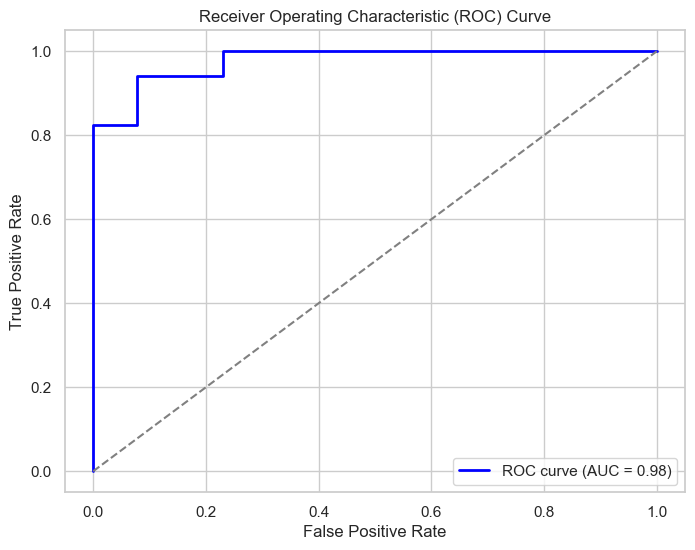

In [59]:
# Make predictions on the test set
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Decision Tree

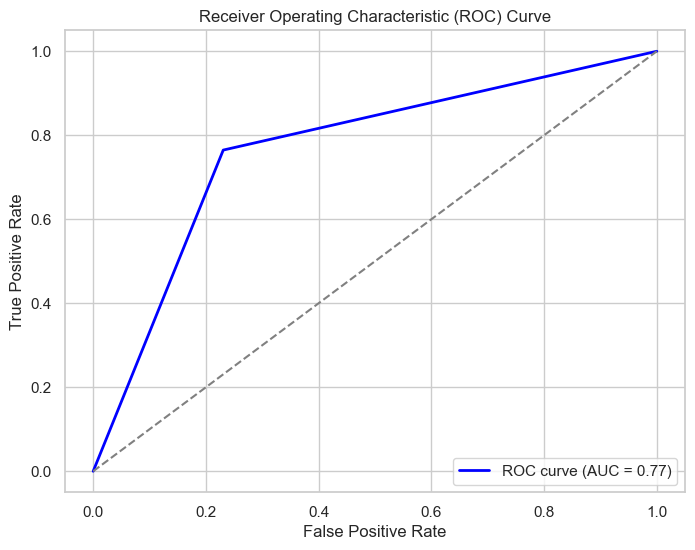

In [60]:
# Make predictions on the test set
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Neural Network

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


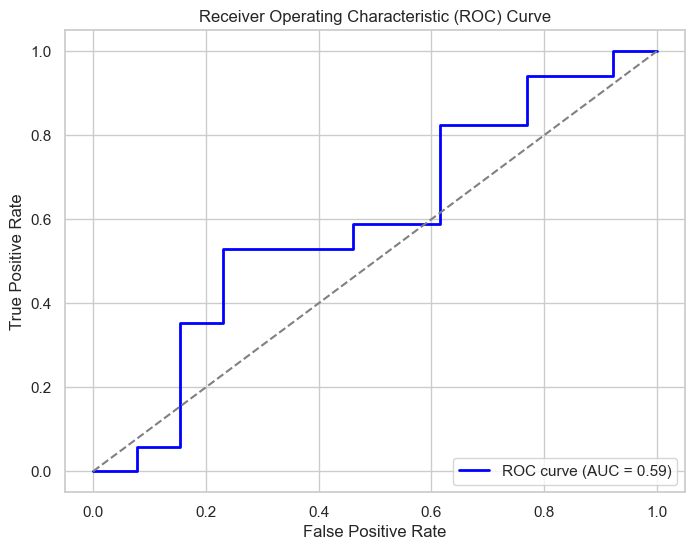

In [61]:
# Make predictions on the test set
y_pred_proba = nn.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Clearly, the Logistic Regression model works the best in our case. The decision tree is somewhat good at classification but the neural network is performing terribly. Now, we can begin by answering the questions we posed earlier.

If you take a quick look at questions 1. and 3., you will see that they go hand-in-hand. The questions are:
1. What customers prefer Light beer over Regular beer?
3. How can the customer base be divided into characteristically different groups?

By finding what kind of customers prefer one type of beer over the other, we can identify the different groups that prefer different beers. This is a classification problem, which means we can use decision tree to classify our customers. 

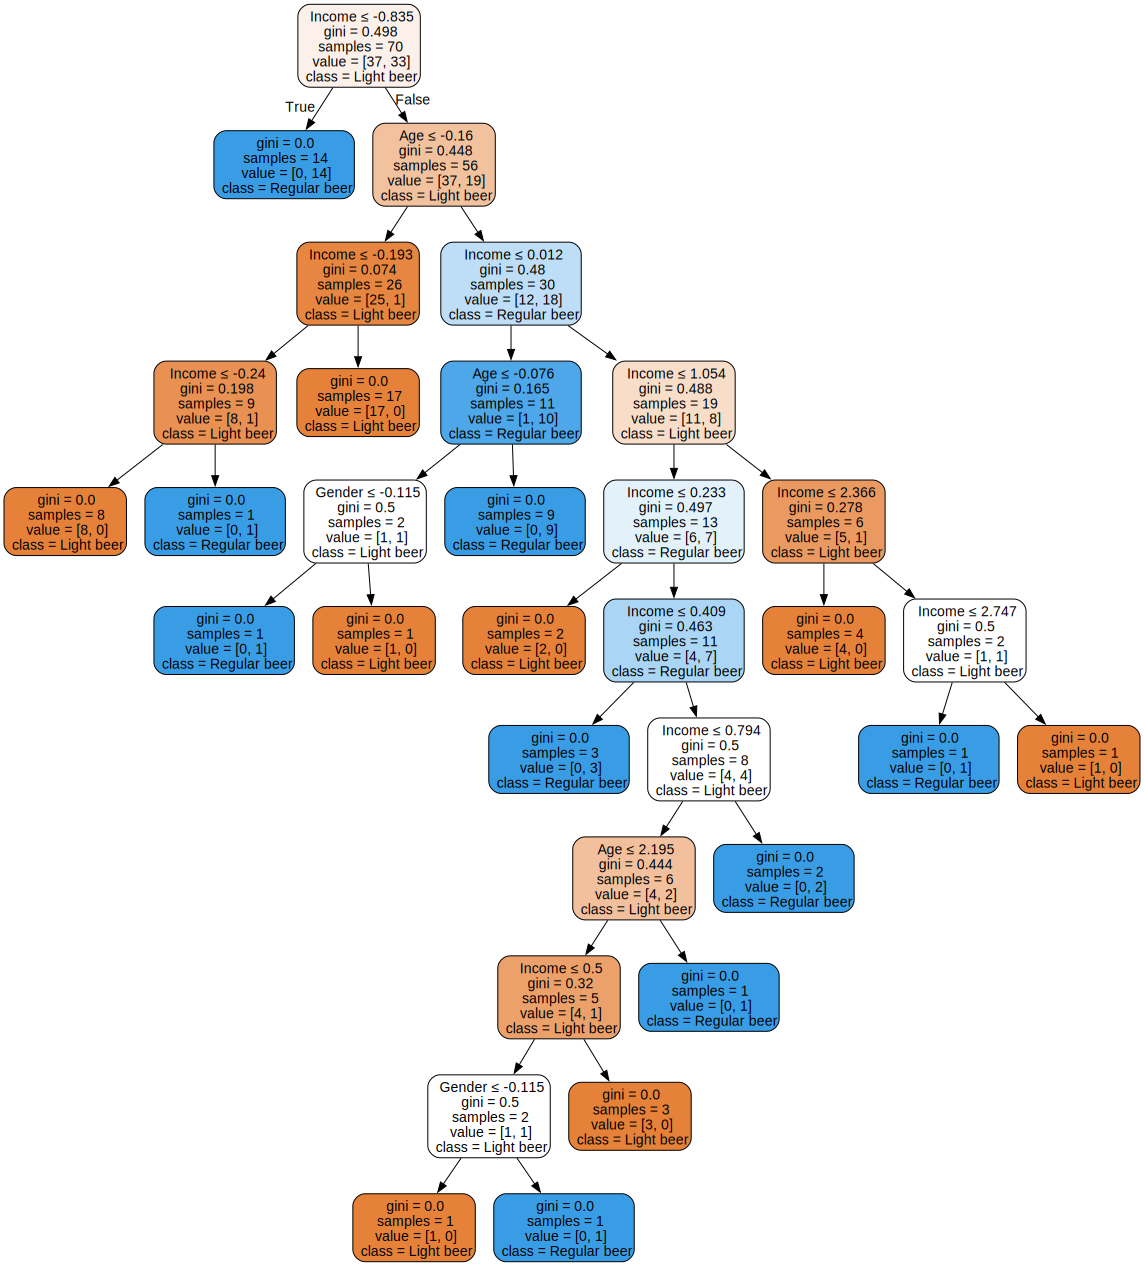

In [62]:
# Export the decision tree to a DOT file
dot_data = export_graphviz(clf, out_file=None, 
                            feature_names=feature_cols,  
                            class_names=['Light beer', 'Regular beer'],  
                            filled=True, rounded=True,  
                            special_characters=True)  

# Render the DOT file
graph = graphviz.Source(dot_data)  

# Save the rendered tree to a file or display it
graph.render("decision_tree")
graph

From the above decision tree, we can see that the primary feature of difference between 2 groups is Income. All observations with Income <= \\$32913.5 prefer Regular beer and those with Income > \\$32913.5 prefer Light beer. It can be healpful to look at the decision tree but we can also check the distributions of the predictors for each classification group.

In [63]:
# Predict class labels for the dataset
beer['predicted_class'] = clf.predict(beer.drop('Preference', axis=1))

# Define a function to compute summary statistics for a group
def compute_summary(group):
    return group.drop(['predicted_class', 'Preference'], axis=1).describe()

# Compute summary statistics for each group
summary_statistics = beer.groupby('predicted_class').apply(compute_summary)

# Display summary statistics
print(summary_statistics)

                          Gender  Married        Income        Age
predicted_class                                                   
0               count  100.00000   100.00    100.000000  100.00000
                mean     0.57000     0.55  40064.310000   44.16000
                std      0.49757     0.50   9725.018742   12.03003
                min      0.00000     0.00  20945.000000   21.00000
                25%      0.00000     0.00  33072.750000   36.00000
                50%      1.00000     1.00  39646.500000   43.00000
                75%      1.00000     1.00  45775.750000   51.25000
                max      1.00000     1.00  70981.000000   87.00000


Above, we can see the distributions. Now, we can start comparing the means of each predictor. Gender and married have a pretty similar mean. As for the differences, the people that prefer Regular beer have an average Income of \\$34634.5 and an average Age of just over 49. The people that prefer Light beer have an average Income of \\$45281.20 and an average Age of 39.

This tells us that people with a lower Income and higher Age tend to prefer Regualar beer over Light beer.

That answers questions 1. and 3. for us.

Now, we will use our Logistic Regression model to answer question 2.

<Axes: ylabel='Feature'>

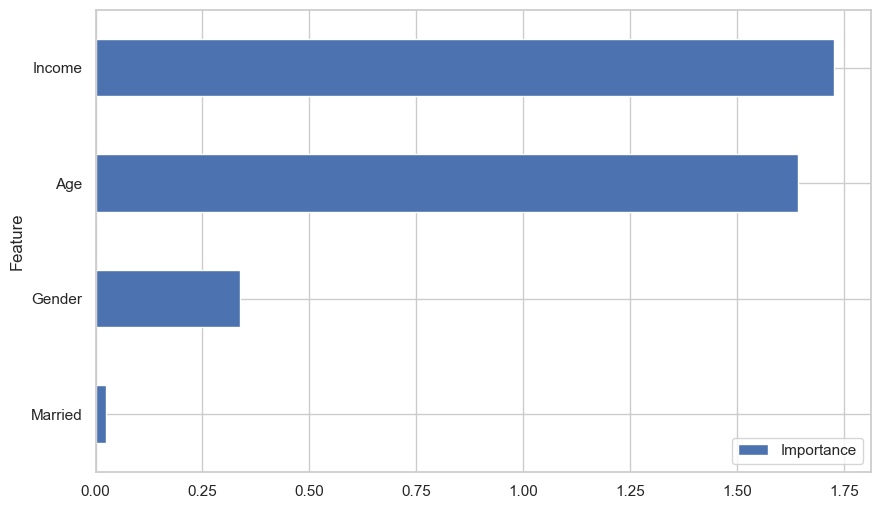

In [64]:
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Above, we can see the importance of each variable to the model. Clearly, Income and Age are the most important. This confirms our answers for the previous questions (Questions 1. and 3.)

## Conclusion

We started this project with a dataset on beer preference. We wanted to find out about trends hidden implicitly within the data. After completing a thorough analysis, we can now answer the questions we had posed in the beginning. To reiterate, the questions we began this project asking were:
1. What customers prefer Light beer over Regular beer?
2. What factors are significant in determining beer preference among individuals?
3. In order to assist with targeted marketing, how can the customer base be divided into characteristically different groups? The company wants fewer number of groups to make marketing easier.

We answered Questions 1. and 3. by using a decision tree model. We found that all customers with income not more than 32913.5 USD prefer Regular beer and those with income over 32913.5 USD prefer Light beer. This information can also help in directing appropriate marketing strategies to the two different groups.

To answer Question 2. we used logistic regression. From the output, we can see that income and age were the most important variables for the predictive model. That tells us that age and income are significant factors  in determining beer preference among individuals.